# Tutorial 8: Model Development (Regression)

## Objectives

After this tutorial you will be able to:

*   Use `scikit-learn` to perform simple linear regression to predict outputs
*   Use `scikit-learn` to perform multiple linear regression to predict outputs
*   Use `scikit-learn` to perform non-linear regression to predict outputs
*   Evaluate the developed models and select the appropriate model

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#import">Import dataset</a>
    </li>
    <br>
    <li>
        <a href="#reg">Regression Overview</a>
    </li>
    <br>
    <li>
        <a href="#slr">Simple Linear Regression</a>
    </li>
    <br>
    <li>
        <a href="#mlr">Multiple Linear Regression</a>
    </li>
    <br>
    <li>
        <a href="#nlr">Non-Linear Regression</a>
    </li>
    <br>
    <li>
        <a href="#pipe">Pipelines and Grid Search</a>
    </li>
    <br>
    <li>
        <a href="#eval">Visual Evaluation of Higher Dimensional Models</a>
    </li>
</ol>


<hr id="import">

<h2>1. Import the dataset</h2>

Import the `Pandas` library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

Read the data from `csv` into a `Pandas DataFrame`

In [2]:
df = pd.read_csv('CO2_Emissions_Canada.csv')
df.head()

Make       Model Vehicle Class  Engine Size [L]  Cylinders Transmission  \
0  ACURA         ILX       COMPACT              2.0          4          AS5   
1  ACURA         ILX       COMPACT              2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT              1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL              3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL              3.5          6          AS6   

  Fuel Type  Fuel Consumption City [L/100 km]  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy [L/100 km]  Fuel Consumption Comb [L/100 km]  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb [mpg]  CO2 Emissions [g/km]  
0                           33                   196  
1                           29                   221  
2                           48                   136  
3                           25                   255  
4                           27                   244

Get information about the columns of the `DataFrame`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size [L]                   7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City [L/100 km]  7385 non-null   float64
 8   Fuel Consumption Hwy [L/100 km]   7385 non-null   float64
 9   Fuel Consumption Comb [L/100 km]  7385 non-null   float64
 10  Fuel Consumption Comb [mpg]       7385 non-null   int64  
 11  CO2 Emissions [g/km]              7385 non-null   int64  
dtypes: flo

In [4]:
df.describe()

Engine Size [L]    Cylinders  Fuel Consumption City [L/100 km]  \
count      7385.000000  7385.000000                       7385.000000   
mean          3.160068     5.615030                         12.556534   
std           1.354170     1.828307                          3.500274   
min           0.900000     3.000000                          4.200000   
25%           2.000000     4.000000                         10.100000   
50%           3.000000     6.000000                         12.100000   
75%           3.700000     6.000000                         14.600000   
max           8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy [L/100 km]  Fuel Consumption Comb [L/100 km]  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000                          4.100000   
25%                           7.500000                          8.900000   
50%                           8.700000                         10.600000   
75%                          10.200000                         12.600000   
max                          20.600000                         26.100000   

       Fuel Consumption Comb [mpg]  CO2 Emissions [g/km]  
count                  7385.000000           7385.000000  
mean                     27.481652            250.584699  
std                       7.231879             58.512679  
min                      11.000000             96.000000  
25%                      22.000000            208.000000  
50%                      27.000000            246.000000  
75%                      32.000000            288.000000  
max                      69.000000            522.000000

<hr id="reg">

<h2>2. Regression Overview</h2>

Regression is a statistical technique used to model the relationship between one or more independent variables (also known as features or predictors) and a dependent variable (also known as the target or response variable).  
The goal of regression is to understand how changes in the independent variables affect the dependent variable. Regression is a powerful tool for prediction, forecasting, and understanding complex relationships in data.

General steps to perform regression using `scikit-learn`:

1. **Data Loading**: extract input features (x) and output target (y)
2. **Data Preprocessing (if necessary)**: prepare input features for the selected regression model
3. **Data Splitting**: split data into training data and testing data for model evaluation
4. **Model Training**: train/fit the selected regression model on the *training* data
5. **Predictions**: make prediction (y_hat) using the trained model
6. **Evaluation**: evaluate the performance of the model using appropriate metrics (i.e. MSE, R-squared)

<hr id="slr">

<h2>3. Simple Linear Regression</h2>

Simple linear regression is a statistical method that models the linear relationship between a single independent variable and a dependent variable.

The model is on the form:
$$
y = ax + b
$$

Where, 
- `a` is the slope of the independent parameter
- `b` is the intercept with the Y axis

In [5]:
# create linear regression model object
lr = LinearRegression()

# get the input and output variables
x = df[['Engine Size [L]']]
y = df['CO2 Emissions [g/km]']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (5908, 1) (5908,)
Testing set:  (1477, 1) (1477,)


In [6]:
# fit the model
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [36.59253717]
Intercept:  134.67756404887967


In [7]:
# make predictions
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('Predictions: ', y_pred_test.shape)

Predictions:  (1477,)


In [8]:
# evaluate the model on training and testing sets
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))

Training set:
MSE: 934.43
RMSE: 30.57
R2: 0.72

Testing set:
MSE: 979.40
RMSE: 31.30
R2: 0.73


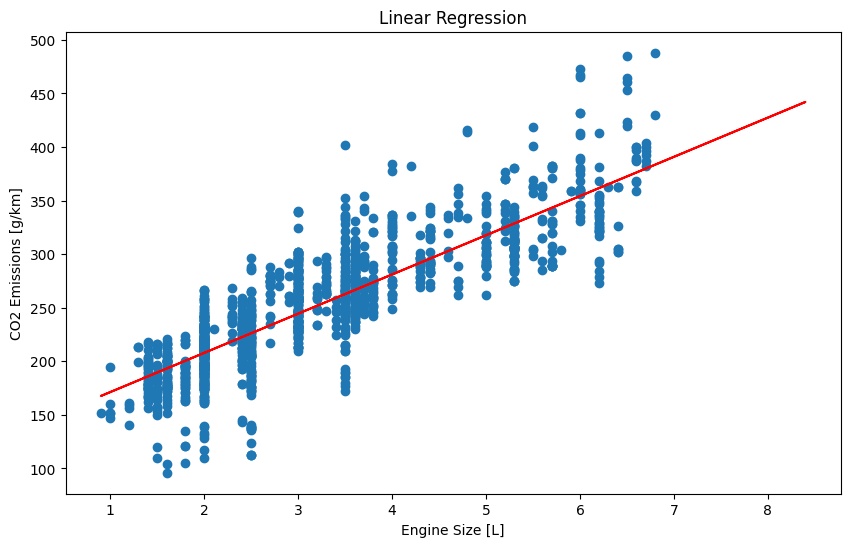

In [9]:
# visualize the model fit
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test)
plt.plot(x, lr.predict(x), color='red')
plt.title('Linear Regression')
plt.xlabel('Engine Size [L]')
plt.ylabel('CO2 Emissions [g/km]')
plt.show()

Visualize the effect of other parameters

<Axes: xlabel='Engine Size [L]', ylabel='CO2 Emissions [g/km]'>

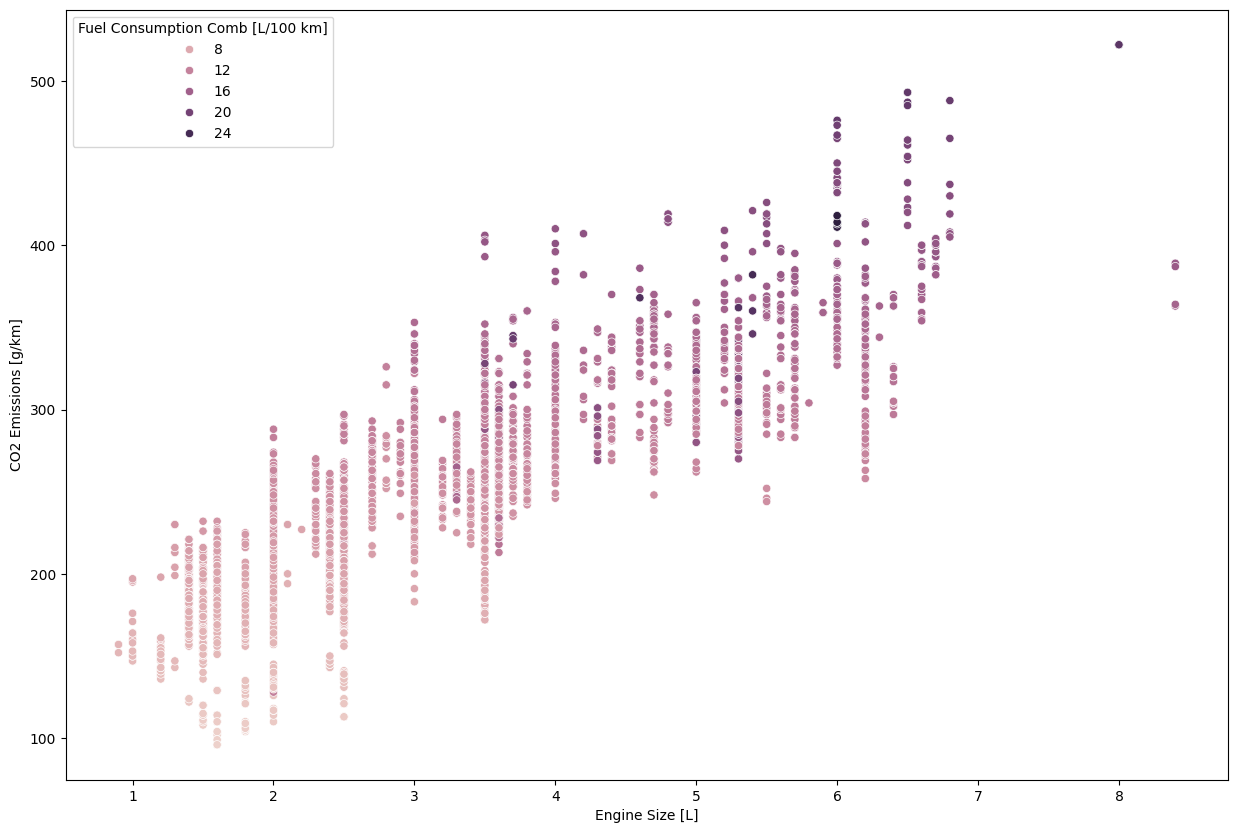

In [10]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Engine Size [L]', y='CO2 Emissions [g/km]', hue='Fuel Consumption Comb [L/100 km]', data=df)

In [11]:
# create linear regression model object
lr = LinearRegression()

# get the input and output variables
x = df[['Fuel Consumption Comb [L/100 km]']]
y = df['CO2 Emissions [g/km]']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (5908, 1) (5908,)
Testing set:  (1477, 1) (1477,)


In [12]:
# fit the model
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [18.6313971]
Intercept:  46.34614494902888


In [13]:
# make predictions
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('Predictions: ', y_pred_test.shape)

Predictions:  (1477,)


In [14]:
# evaluate the model on training and testing sets
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))

Training set:
MSE: 532.66
RMSE: 23.08
R2: 0.85

Testing set:
MSE: 560.18
RMSE: 23.67
R2: 0.83


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


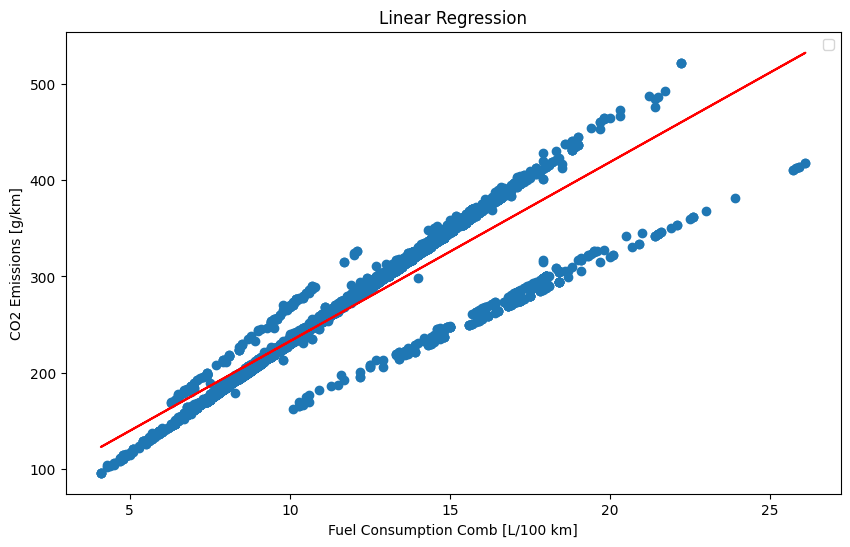

In [15]:
# visualize the model fit
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train)
plt.plot(x, lr.predict(x), color='red')
plt.title('Linear Regression')
plt.xlabel('Fuel Consumption Comb [L/100 km]')
plt.ylabel('CO2 Emissions [g/km]')
plt.legend()
plt.show()

Visualize the effect of other parameters

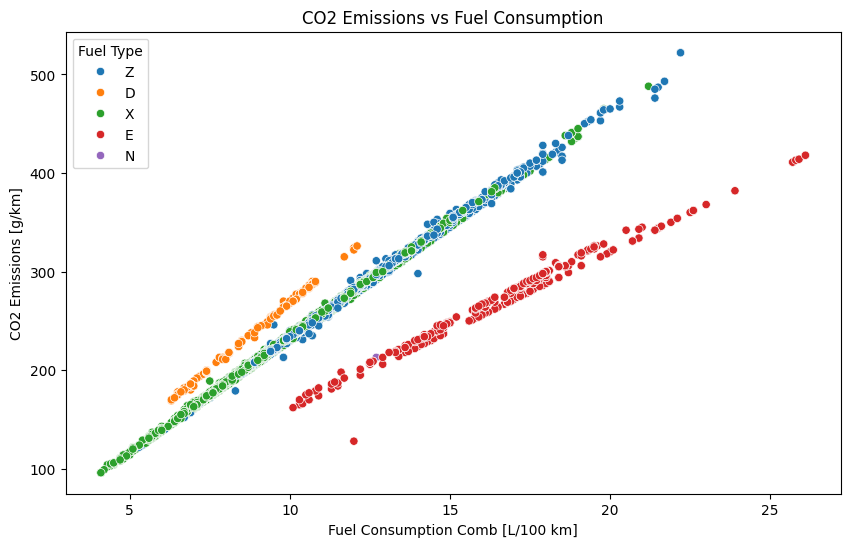

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='Fuel Consumption Comb [L/100 km]', y='CO2 Emissions [g/km]', hue='Fuel Type')
plt.title('CO2 Emissions vs Fuel Consumption')
plt.show()

<hr id="mlr">

<h2>4. Multiple Linear Regression</h2>

Multiple linear regression is an extension of simple linear regression that allows for the inclusion of multiple independent variables. It assumes that the relationship between the dependent variable and the independent variables is linear and additive, meaning that the effect of each independent variable on the dependent variable is independent of the other independent variables.

The model is on the form:
$$
y = a_0 +  a_1x_1 + a_2x_2 + ...
$$

Where,
- `a_0` is the intercept with the Y axis
- `a_1, a_2, ...` is the slope of each independent parameter

In [17]:
# create linear regression model object
lr = LinearRegression()

# get the input and output variables
x = df[['Engine Size [L]', 'Fuel Consumption Comb [L/100 km]']]
y = df['CO2 Emissions [g/km]']

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (5908, 2) (5908,)
Testing set:  (1477, 2) (1477,)


In [18]:
# fit the model
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [12.88438497 13.70025632]
Intercept:  59.51188798347536


In [19]:
# make predictions
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('Predictions: ', y_pred_test.shape)

Predictions:  (1477,)


In [20]:
# evaluate the model on training and testing sets
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))

Training set:
MSE: 426.53
RMSE: 20.65
R2: 0.88

Testing set:
MSE: 458.89
RMSE: 21.42
R2: 0.87


In [21]:
# use plotly to create an interactive 3D plot
import plotly.express as px
import plotly.graph_objects as go


# plot scatter plot in 3D
fig = px.scatter_3d(df, x='Engine Size [L]', y='Fuel Consumption Comb [L/100 km]', z='CO2 Emissions [g/km]', color='Fuel Type')
fig.update_traces(marker=dict(size=3))

# add linear regression surface
x_grid = np.arange(0.0, 10.0, 0.1)
y_grid = np.arange(0.0, 30.0, 0.1)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
x_lr = np.stack((x_grid.flatten(), y_grid.flatten()), axis=1)
z_grid = lr.predict(x_lr).reshape(x_grid.shape)

fig.add_trace(go.Surface(
    x=x_grid,
    y=y_grid,
    z=z_grid,
    opacity=0.2,
    showscale=False,    
    surfacecolor=z_grid-z_grid,
))

# update figure size
fig.update_layout(
    height=700,
)
fig.show()

c:\Users\chesa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



<hr id="nlr">

<h2>5. Non-Linear Regression</h2>

Non-linear regression is a statistical method that models the relationship between a single or multiple independent variables and a dependent variable when the relationship is not linear.  
Non-linear regression techniques can capture more complex relationships between variables than linear regression methods.  
Some common non-linear regression techniques include polynomial regression, support vector regression (SVR), decision tree regression, and neural networks.

For different non-linear equations (e.g. polynomial, exponential, etc.). It is common to linearize the equation, then perform linear regression on the linearized equation using the `LinearRegression()` model.

For example, for a polynomial of the second degree:
$$
y = a_0 + a_1x + a_2x^2
$$
This can be linearized as follows:
$$
y = a_0 + a_1x_1 + a_2x_2
$$
Where,
$$ 
x_1 = x  \\
x_2 = x^2
$$

In [22]:
# create linear regression model object
lr = LinearRegression()

# get the input and output variables
x = df[['Engine Size [L]']]
y = df['CO2 Emissions [g/km]']

# create polynomial features
# automatically creates new columns for x^2, x^3, x^4, ... calculated from the input variable x
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print('Polynomial features: ', x_poly.shape)
print()
print(x[:5])
print()
print(x_poly[:5])

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Polynomial features:  (7385, 2)

   Engine Size [L]
0              2.0
1              2.4
2              1.5
3              3.5
4              3.5

[[ 2.    4.  ]
 [ 2.4   5.76]
 [ 1.5   2.25]
 [ 3.5  12.25]
 [ 3.5  12.25]]
Training set:  (5908, 2) (5908,)
Testing set:  (1477, 2) (1477,)


In [23]:
# fit the model
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [53.12021531 -2.19997805]
Intercept:  108.68106624103922


In [24]:
# make predictions
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('Predictions: ', y_pred_test.shape)

Predictions:  (1477,)


In [25]:
# evaluate the model on training and testing sets
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))


Training set:
MSE: 924.01
RMSE: 30.40
R2: 0.73

Testing set:
MSE: 918.01
RMSE: 30.30
R2: 0.73


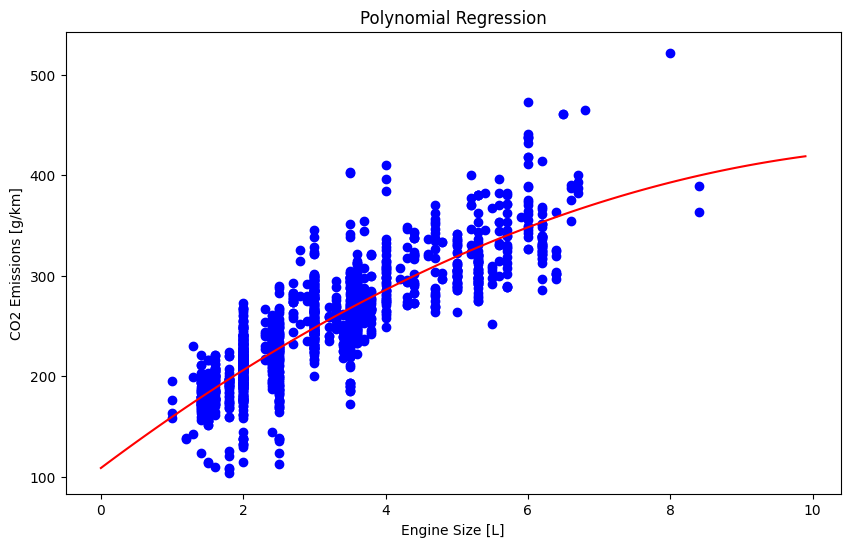

In [26]:
# visualize the model fit
plt.figure(figsize=(10, 6))
plt.scatter(x_test[:, 0], y_test, color='blue')
x_fit = np.arange(0.0, 10.0, 0.1)
y_fit = lr.intercept_ + lr.coef_[0] * x_fit + lr.coef_[1] * x_fit ** 2
plt.plot(x_fit, y_fit, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Engine Size [L]')
plt.ylabel('CO2 Emissions [g/km]')
plt.show()

### Multiple Non-Linear Regression

In [27]:
# create linear regression model object
lr = LinearRegression()

# get the input and output variables
x = df[['Engine Size [L]', 'Fuel Consumption Comb [L/100 km]']]
y = df['CO2 Emissions [g/km]']

# create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print('Polynomial features: ', x_poly.shape)
print()
print(x[:5])
print()
print(x_poly[:5])
print()

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Polynomial features:  (7385, 5)

   Engine Size [L]  Fuel Consumption Comb [L/100 km]
0              2.0                               8.5
1              2.4                               9.6
2              1.5                               5.9
3              3.5                              11.1
4              3.5                              10.6

[[  2.     8.5    4.    17.    72.25]
 [  2.4    9.6    5.76  23.04  92.16]
 [  1.5    5.9    2.25   8.85  34.81]
 [  3.5   11.1   12.25  38.85 123.21]
 [  3.5   10.6   12.25  37.1  112.36]]

Training set:  (5908, 5) (5908,)
Testing set:  (1477, 5) (1477,)


In [28]:
# fit the model
lr.fit(x_train, y_train)
print('Coefficients: ', lr.coef_)
print('Intercept: ', lr.intercept_)

Coefficients:  [-28.82527554  41.63557498  -4.41624236   5.92834262  -1.953074  ]
Intercept:  -35.96759208873124


In [29]:
# make predictions
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('Predictions: ', y_pred_test.shape)

Predictions:  (1477,)


In [30]:
# evaluate the model on training and testing sets
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))

Training set:
MSE: 274.45
RMSE: 16.57
R2: 0.92

Testing set:
MSE: 345.65
RMSE: 18.59
R2: 0.90


In [31]:
# use plotly to create an interactive 3D plot

# plot scatter plot in 3D
fig = px.scatter_3d(df, x='Engine Size [L]', y='Fuel Consumption Comb [L/100 km]', z='CO2 Emissions [g/km]', color='Fuel Type')
fig.update_traces(marker=dict(size=3))

# add linear regression surface
x_grid = np.arange(0.0, 10.0, 0.1)
y_grid = np.arange(0.0, 30.0, 0.1)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

# create polynomial features
x_poly_grid = np.stack((x_grid.flatten(), y_grid.flatten()), axis=1)
x_poly_grid = poly.fit_transform(x_poly_grid)
z_grid = lr.predict(x_poly_grid).reshape(x_grid.shape)

fig.add_trace(go.Surface(
    x=x_grid,
    y=y_grid,
    z=z_grid,
    opacity=0.2,
    showscale=False,    
    surfacecolor=z_grid-z_grid,
))

# update figure size
fig.update_layout(
    height=700,
)
fig.show()

<hr id="pipe">

<h2>6. Pipelines and Grid Search</h2>

### Pipelines

Scikit-learn pipelines chain together multiple preprocessing, transformation, and modeling steps in a sequential workflow. This simplifies machine learning workflows and improves code organization and readability.

Benefits:

- Improved code organization and readability: Easier to understand and maintain workflows.
- Reduced boilerplate code: Single call to fit and predict the entire pipeline.
- Automatic cross-validation: Simplifies hyperparameter tuning by applying cross-validation to the entire pipeline.
- Streamlined workflow: Automates data processing and model training steps.

In [32]:
# get the input and output variables
x = df[['Engine Size [L]', 'Fuel Consumption Comb [L/100 km]']]
y = df['CO2 Emissions [g/km]']

# create pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (5908, 2) (5908,)
Testing set:  (1477, 2) (1477,)


In [33]:
# fit the model
pipe.fit(x_train, y_train)
print('Coefficients: ', pipe['lr'].coef_)
print('Intercept: ', pipe['lr'].intercept_)

Coefficients:  [ -42.56155163  119.7963081   -51.73590084  167.85027857 -147.80494498]
Intercept:  250.62711577521924


In [34]:
# make predictions
y_pred_train = pipe.predict(x_train)
y_pred_test = pipe.predict(x_test)
print('Predictions: ', y_pred_test.shape)

Predictions:  (1477,)


In [35]:
# evaluate the model on training and testing sets
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))

Training set:
MSE: 278.64
RMSE: 16.69
R2: 0.92

Testing set:
MSE: 333.28
RMSE: 18.26
R2: 0.91


### Grid Search

Scikit-learn's GridSearchCV (Grid Search Cross-Validation) is a hyperparameter tuning method that systematically evaluates model performance across a predefined grid of parameter values. It automates the process of exploring different training configurations, ultimately identifying the combination that yields the best performance on unseen data.

Algorithm:

1. Generate parameter combinations: GridSearchCV iterates through all possible combinations of the specified parameter values.
2. Train and evaluate models: For each combination, a separate model is trained on a subset of the data (one fold) and evaluated on the remaining folds (unseen data).
3. Performance scoring: A chosen metric (e.g., accuracy, F1-score) is used to quantify the model's performance on each fold.
4. Aggregate results: Scores are averaged across folds for each parameter combination.
5. Identify best model: The combination with the highest average score is identified as the optimal configuration.

Benefits:

- Improved model performance: By exploring various configurations, GridSearchCV optimizes hyperparameters, potentially leading to significantly better model performance.
- Reduced manual effort: Automates the hyperparameter tuning process, saving time and effort compared to manual exploration.
- Data-driven insights: Provides data-driven insights into how different parameter values influence model performance.

In [36]:
# grid search
from sklearn.model_selection import GridSearchCV

# get the input and output variables
x = df[['Engine Size [L]', 'Fuel Consumption Comb [L/100 km]']]
y = df['CO2 Emissions [g/km]']

# create pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# create grid search
param_grid = {
    'poly__degree': [1, 2, 3],
}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='r2')

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

Training set:  (5908, 2) (5908,)
Testing set:  (1477, 2) (1477,)


In [37]:
# fit the model
grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters: ', grid.best_params_)
print('Best score: ', grid.best_score_)


Best parameters:  {'poly__degree': 3}
Best score:  0.919908974117871


In [38]:
# make predictions
y_pred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)
print('Predictions: ', y_pred_test.shape)

Predictions:  (1477,)


In [39]:
# evaluate the model on training and testing sets
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))

Training set:
MSE: 272.16
RMSE: 16.50
R2: 0.92

Testing set:
MSE: 268.35
RMSE: 16.38
R2: 0.92


<hr id="eval">

<h2>7. Visual Evaluation of Higher Dimensional Models</h2>

Fit a model with more than 2 input parameters (total dimensions > 3)

In [48]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor

# get the input and output variables
x = df[['Engine Size [L]', 'Fuel Consumption Comb [L/100 km]', 'Fuel Type']]
y = df['CO2 Emissions [g/km]']

# one-hot encode categorical variable: Fuel Type
x = pd.get_dummies(x)
print('One-hot encoded features: ', x.shape)

# create decision tree regression model object
tree = DecisionTreeRegressor()

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Training set: ', x_train.shape, y_train.shape)
print('Testing set: ', x_test.shape, y_test.shape)

x.head()

One-hot encoded features:  (7385, 7)
Training set:  (5908, 7) (5908,)
Testing set:  (1477, 7) (1477,)


Engine Size [L]  Fuel Consumption Comb [L/100 km]  Fuel Type_D  \
0              2.0                               8.5        False   
1              2.4                               9.6        False   
2              1.5                               5.9        False   
3              3.5                              11.1        False   
4              3.5                              10.6        False   

   Fuel Type_E  Fuel Type_N  Fuel Type_X  Fuel Type_Z  
0        False        False        False         True  
1        False        False        False         True  
2        False        False        False         True  
3        False        False        False         True  
4        False        False        False         True

In [49]:
# fit the model
tree.fit(x_train, y_train)

LinearRegression()

In [50]:
# make predictions
y_pred_train = tree.predict(x_train)
y_pred_test = tree.predict(x_test)
print('Predictions: ', y_pred_test.shape)

Predictions:  (1477,)


In [51]:
# evaluate the model on training and testing sets
print('Training set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R2: {:.2f}'.format(r2_score(y_train, y_pred_train)))
print()
print('Testing set:')
print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R2: {:.2f}'.format(r2_score(y_test, y_pred_test)))

Training set:
MSE: 28.34
RMSE: 5.32
R2: 0.99

Testing set:
MSE: 35.19
RMSE: 5.93
R2: 0.99


**1. Predicted vs Actual Plot**

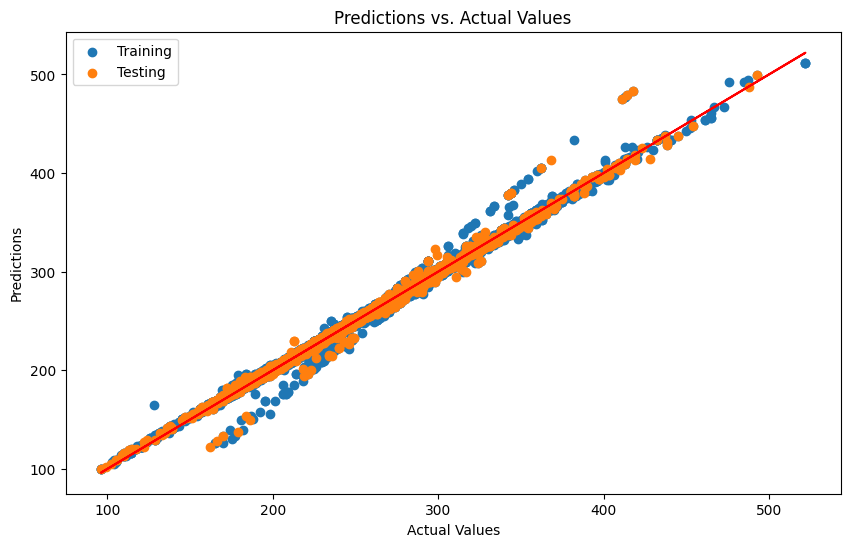

In [52]:
# plot the predictions vs. the actual values for training and testing sets
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, label='Training')
plt.scatter(y_test, y_pred_test, label='Testing')

# plot 45 degree line
plt.plot(y, y, color='red')

plt.title('Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

**2. Residuals Plot**

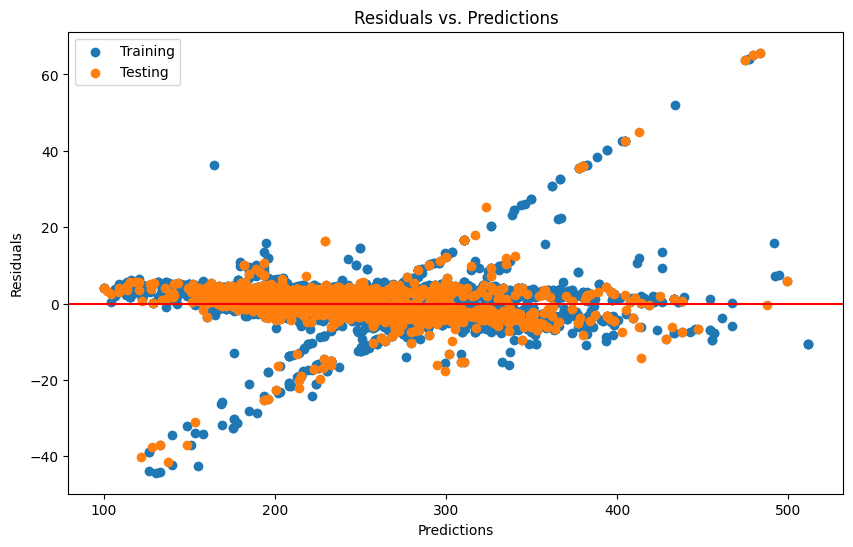

In [53]:
# plot the residuals vs. the predictions for training and testing sets
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, y_pred_train - y_train, label='Training')
plt.scatter(y_pred_test, y_pred_test - y_test, label='Testing')

# plot 0 line
plt.axhline(y=0, color='red')

plt.title('Residuals vs. Predictions')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.legend()
plt.show()

**3. Feature Importances**

In [54]:
# plot relative feature importance
features = pd.Series(tree.feature_importances_, index=x.columns)
features.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=features.index)
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

#### NOTE
Model development and evaluation is an iterative process.  
We typically try multiple models and different combinations of parameters and select the most accurate based on the evaluation metrics.

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>
<a href="https://www.w3schools.com/python/default.asp">w3schools.com</a>
<br>
<a href="https://www.kaggle.com/datasets/mrmorj/car-fuel-emissions">CO2 emissions dataset (kaggle.com)</a>